Prever o sálario de algúem com base nas horas de estudos

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
#Esta importando especificamente o modelo de regressão linear
from sklearn.linear_model import LinearRegression
#Importa a função de dividir os dados de treino e teste
from sklearn.model_selection import train_test_split

In [3]:
df = pandas.read_csv("dataset.csv")

In [4]:
df.shape

(500, 2)

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
#Correlação entre as váriaveis
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [8]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

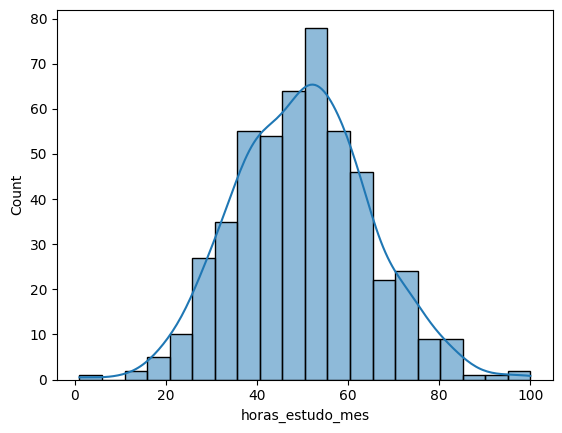

In [9]:
#Histograma das horas de estudo por mes
seaborn.histplot(data = df, x = 'horas_estudo_mes', kde=True)

<Axes: xlabel='salario', ylabel='Count'>

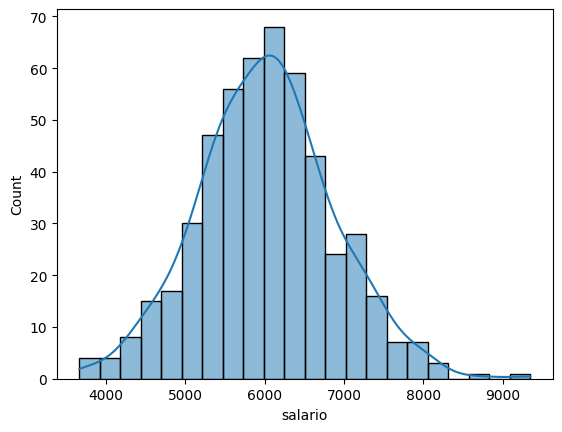

In [10]:
#Histograma do sálario
seaborn.histplot(data = df, x = 'salario', kde=True)

In [11]:
#Vai converter a coluna horas_estudo_mes em array na variavel x
x = numpy.array(df['horas_estudo_mes']) #Esta é a váriavel de entrada

type(x)

numpy.ndarray

In [12]:
#O primeiro número diz que é 1 dimensão e o segundo é o numero de colunas
x = x.reshape(-1, 1) #Esta deixando o array no formato para o Scikit Learn
    #Está deixando o array com apenas uma coluna, ao invés das várias que tinha
print(x)

[[ 57.]
 [ 48.]
 [ 60.]
 [ 73.]
 [ 46.]
 [ 46.]
 [ 74.]
 [ 62.]
 [ 43.]
 [ 58.]
 [ 43.]
 [ 43.]
 [ 54.]
 [ 21.]
 [ 24.]
 [ 42.]
 [ 35.]
 [ 55.]
 [ 36.]
 [ 29.]
 [ 72.]
 [ 47.]
 [ 51.]
 [ 29.]
 [ 42.]
 [ 52.]
 [ 33.]
 [ 56.]
 [ 41.]
 [ 46.]
 [ 41.]
 [ 78.]
 [ 50.]
 [ 34.]
 [ 62.]
 [ 32.]
 [ 53.]
 [ 21.]
 [ 30.]
 [ 53.]
 [ 61.]
 [ 53.]
 [ 48.]
 [ 45.]
 [ 28.]
 [ 39.]
 [ 43.]
 [ 66.]
 [ 55.]
 [ 24.]
 [ 55.]
 [ 44.]
 [ 40.]
 [ 59.]
 [ 65.]
 [ 64.]
 [ 37.]
 [ 45.]
 [ 55.]
 [ 65.]
 [ 43.]
 [ 47.]
 [ 33.]
 [ 32.]
 [ 62.]
 [ 70.]
 [ 49.]
 [ 65.]
 [ 55.]
 [ 40.]
 [ 55.]
 [ 73.]
 [ 49.]
 [ 73.]
 [ 11.]
 [ 62.]
 [ 51.]
 [ 46.]
 [ 51.]
 [ 20.]
 [ 47.]
 [ 55.]
 [ 72.]
 [ 42.]
 [ 38.]
 [ 42.]
 [ 64.]
 [ 55.]
 [ 42.]
 [ 58.]
 [ 51.]
 [ 65.]
 [ 39.]
 [ 45.]
 [ 44.]
 [ 28.]
 [ 54.]
 [ 54.]
 [ 50.]
 [ 46.]
 [ 29.]
 [ 44.]
 [ 45.]
 [ 38.]
 [ 48.]
 [ 56.]
 [ 78.]
 [ 53.]
 [ 54.]
 [ 49.]
 [ 21.]
 [ 50.]
 [ 51.]
 [ 87.]
 [ 47.]
 [ 55.]
 [ 49.]
 [ 32.]
 [ 67.]
 [ 61.]
 [ 62.]
 [ 36.]
 [ 71.]
 [ 29.]
 [ 59.]


In [13]:
#Prepara a variavel de saída
y = df['salario'] #Na de saída não é preciso o reshape

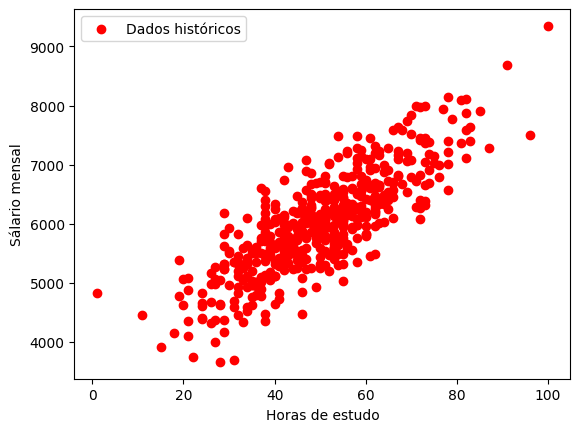

In [14]:
#Gráfico de dispersão
plt.scatter(x, y, color = 'red', label = 'Dados históricos')
plt.xlabel('Horas de estudo')
plt.ylabel('Sálario mensal')
plt.legend()

In [15]:
#Divide os dados entre treino e teste
                                #Função que separa os dados, test_size especifica o tamanho da amostragem dos testes
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2) #Neste caso é 20% teste e 80% treino
                                #A função faz uma separação aleatoria dos dados

In [16]:
x_treino.shape #Ficou 400 dados para o treino

(400, 1)

In [17]:
y_treino.shape #O shape aparece diferente pq o x esta no formato de matriz, e o y esta no formato de array

(400,)

In [18]:
x_teste.shape #Ficou 100 dados para o teste

(100, 1)

In [19]:
y_teste.shape

(100,)

Os dados estão prontos para o uso, já da pra começar o machine learning

                    Modelagem preditiva(Machine Learning)

In [20]:
#Cria o modelo de aprendizagem
modelo = LinearRegression()

In [21]:
#Começa o treinamento do modelo
modelo.fit(x_treino, y_treino) #fit é a função pra treinar o algoritmo
    #Passa nele as variaveis de treinamento

LinearRegression()

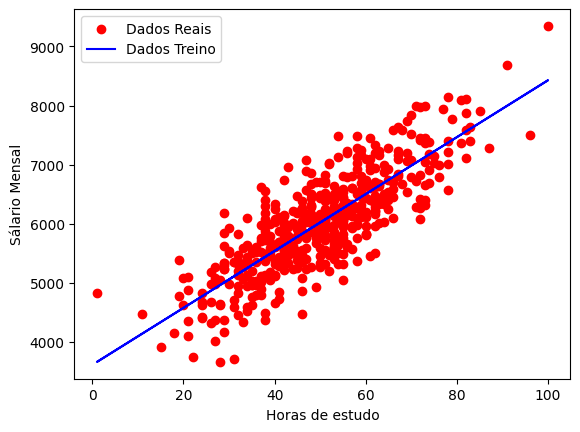

In [27]:
#Mostra a reta da regressão linear das previsões em cima dos dados reais
plt.scatter(x, y, color='red', label='Dados Reais')
plt.plot(x, modelo.predict(x), color='blue', label='Previsão')
plt.xlabel('Horas de estudo')
plt.ylabel('Sálario Mensal')
plt.legend()
plt.show()

#É um valor aproximado

In [31]:
#Vai testar o modelo
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}') #Tipo a nota dos acertos do modelo
                            #O .2f é pra limitar os numeros depois da virgula no resultado

Coeficiente R^2: 0.66


Deploy do modelo de Machine Learning

In [35]:
#Colocar um novo valor para o modelo
horas_estudo_novo = numpy.array([[25]])

In [36]:
salario_previsto = modelo.predict(horas_estudo_novo)

In [37]:
print(f'Horas de estudo: {horas_estudo_novo}; Sálario previsto: {salario_previsto}')

Horas de estudo: [[25]]; Sálario previsto: [4813.41280735]
